In [183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/old-car-price-prediction/car_price.csv


In [184]:
df=pd.read_csv('/kaggle/input/old-car-price-prediction/car_price.csv')

In [185]:
df.shape

(5512, 10)

In [186]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


#### **To Droping orDelete the unwanted only one column. For multiple column < df.drop(columns=['col1','col2',....'colN']) >**

In [187]:
df=df.drop(columns='Unnamed: 0')
##for multiple columns droppig 
##df=df.drop(columns=['Unnamed: 0','car_name'])

In [188]:
df.tail()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats
5511,BMW 5 Series 520d M Sport,31.90 Lakh,"42,000 kms",Diesel,Automatic,2nd Owner,2017,1991 cc,5 Seats


In [189]:
df.sample(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
2959,Audi A6 3.0 TDI Quattro Premium Plus,13.80 Lakh,"71,000 kms",Diesel,Automatic,3rd Owner,2014,998 cc,5 Seats
3037,Maruti Zen Estilo LXI BSIII,1 Lakh,"1,10,000 kms",Petrol,Manual,3rd Owner,2008,1950 cc,8 Seats
3459,Maruti Alto K10 VXI,3.61 Lakh,"26,360 kms",Petrol,Manual,1st Owner,2019,1462 cc,7 Seats
2800,Maruti Alto LXi,"80,000","50,000 kms",Petrol,Manual,2nd Owner,2007,1248 cc,5 Seats
2795,Maruti Swift Dzire VDI,4.20 Lakh,"1,20,000 kms",Diesel,Manual,2nd Owner,2015,998 cc,5 Seats


In [190]:
df.isnull().sum()

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [192]:
df['car_name'].unique()

array(['Jeep Compass 2.0 Longitude Option BSIV',
       'Renault Duster RXZ Turbo CVT', 'Toyota Camry 2.5 G', ...,
       'Volvo XC 90 D5 Momentum BSIV',
       'Mercedes-Benz E-Class E250 Edition E', 'BMW M Series M4 Coupe'],
      dtype=object)

In [193]:
df['car_name']=df['car_name'].str.replace('"','').str.replace('','').str.replace("'",'').astype(str)

In [194]:
df['car_prices_in_rupee'].unique()

array(['10.03 Lakh', '12.83 Lakh', '16.40 Lakh', ..., '28.90 Lakh',
       '64.90 Lakh', '31.90 Lakh'], dtype=object)

In [195]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace("Lakh","")


In [196]:
df['car_prices_in_rupee'].unique()

array(['10.03 ', '12.83 ', '16.40 ', ..., '28.90 ', '64.90 ', '31.90 '],
      dtype=object)

In [197]:
df['car_name'].unique()

array(['Jeep Compass 2.0 Longitude Option BSIV',
       'Renault Duster RXZ Turbo CVT', 'Toyota Camry 2.5 G', ...,
       'Volvo XC 90 D5 Momentum BSIV',
       'Mercedes-Benz E-Class E250 Edition E', 'BMW M Series M4 Coupe'],
      dtype=object)

In [198]:
df['kms_driven'].unique()

array(['86,226 kms', '13,248 kms', '60,343 kms', ..., '1,54,000 kms',
       '79,718 kms', '85,002 kms'], dtype=object)

In [199]:
df['kms_driven']=df['kms_driven'].str.replace("kms","")

In [200]:
df['kms_driven'].unique()

array(['86,226 ', '13,248 ', '60,343 ', ..., '1,54,000 ', '79,718 ',
       '85,002 '], dtype=object)

In [201]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'], dtype=object)

In [202]:
df['fuel_type']=df['fuel_type'].str.replace('','')

In [203]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'], dtype=object)

In [204]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [205]:
df['ownership'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner',
       '0th Owner'], dtype=object)

In [206]:
df['ownership']=df['ownership'].str.replace("Owner","")

In [207]:
df['ownership'].unique()

array(['1st ', '2nd ', '3rd ', '4th ', '5th ', '0th '], dtype=object)

In [208]:
df['manufacture'].unique()

array([2017, 2021, 2016, 2018, 2015, 2014, 2020, 2019, 2012, 2008, 2013,
       2022, 2010, 2005, 2009, 2006, 2011, 2007, 2002, 2004, 1998, 2003,
       1995, 2000, 2001, 1999])

In [209]:
df['engine'].unique()

array(['1956 cc', '1330 cc', '2494 cc', '1199 cc', '1197 cc', '1498 cc',
       '1497 cc', '1368 cc', '1396 cc', '1373 cc', '1198 cc', '1462 cc',
       '799 cc', '998 cc', '1591 cc', '1999 cc', '999 cc', '814 cc',
       '796 cc', '1353 cc', '1451 cc', '1995 cc', '1991 cc', '2179 cc',
       '1798 cc', '1985 cc', '1968 cc', '2993 cc', '4134 cc', '1598 cc',
       '936 cc', '1248 cc', '2143 cc', '1086 cc', '1998 cc', '2198 cc',
       '2499 cc', '1496 cc', '1186 cc', '1582 cc', '1984 cc', '1997 cc',
       '1969 cc', '1493 cc', '2755 cc', '1196 cc', '2953 cc', '2184 cc',
       '1461 cc', '2987 cc', '1950 cc', '1395 cc', '2523 cc', '1193 cc',
       '1061 cc', '1298 cc', '1586 cc', '993 cc', '2354 cc', '1405 cc',
       '2967 cc', '0 cc', '2694 cc', '2696 cc', '2609 cc', '2998 cc',
       '2477 cc', '2393 cc', '2982 cc', '2199 cc', '1799 cc', '3198 cc',
       '1194 cc', '2997 cc', '1495 cc', '1794 cc', '2498 cc', '1364 cc',
       '1388 cc', '2596 cc', '1173 cc', '1797 cc', '1499 cc',

In [210]:
df['engine']=df['engine'].str.replace("cc","")

In [211]:
df['engine'].unique()

array(['1956 ', '1330 ', '2494 ', '1199 ', '1197 ', '1498 ', '1497 ',
       '1368 ', '1396 ', '1373 ', '1198 ', '1462 ', '799 ', '998 ',
       '1591 ', '1999 ', '999 ', '814 ', '796 ', '1353 ', '1451 ',
       '1995 ', '1991 ', '2179 ', '1798 ', '1985 ', '1968 ', '2993 ',
       '4134 ', '1598 ', '936 ', '1248 ', '2143 ', '1086 ', '1998 ',
       '2198 ', '2499 ', '1496 ', '1186 ', '1582 ', '1984 ', '1997 ',
       '1969 ', '1493 ', '2755 ', '1196 ', '2953 ', '2184 ', '1461 ',
       '2987 ', '1950 ', '1395 ', '2523 ', '1193 ', '1061 ', '1298 ',
       '1586 ', '993 ', '2354 ', '1405 ', '2967 ', '0 ', '2694 ', '2696 ',
       '2609 ', '2998 ', '2477 ', '2393 ', '2982 ', '2199 ', '1799 ',
       '3198 ', '1194 ', '2997 ', '1495 ', '1794 ', '2498 ', '1364 ',
       '1388 ', '2596 ', '1173 ', '1797 ', '1499 ', '1399 ', '4461 ',
       '2400 ', '1896 ', '1796 ', '3956 ', '995 ', '2995 ', '2487 ',
       '624 ', '1993 ', '2925 ', '1599 ', '1299 ', '1120 ', '2489 ',
       '5461 ', '3996 '

In [212]:
df['Seats'].unique()

array(['5 Seats', '6 Seats', '7 Seats', '4 Seats', '8 Seats', '2 Seats'],
      dtype=object)

In [213]:
df['Seats']=df['Seats'].str.replace("Seats","")

In [214]:
df['Seats'].unique()

array(['5 ', '6 ', '7 ', '4 ', '8 ', '2 '], dtype=object)

In [215]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,"86,226",Diesel,Manual,1st,2017,1956,5
1,Renault Duster RXZ Turbo CVT,12.83,"13,248",Petrol,Automatic,1st,2021,1330,5
2,Toyota Camry 2.5 G,16.40,"60,343",Petrol,Automatic,1st,2016,2494,5
3,Honda Jazz VX CVT,7.77,"26,696",Petrol,Automatic,1st,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,5.15,"69,414",Petrol,Manual,1st,2016,1199,5


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [217]:
# df['kms_driven']=
df['kms_driven'].unique()

array(['86,226 ', '13,248 ', '60,343 ', ..., '1,54,000 ', '79,718 ',
       '85,002 '], dtype=object)

In [218]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [219]:
df['kms_driven']=df['kms_driven'].astype(int)

In [220]:
df['car_prices_in_rupee'].unique()

array(['10.03 ', '12.83 ', '16.40 ', ..., '28.90 ', '64.90 ', '31.90 '],
      dtype=object)

In [221]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace('Crore','').str.replace(',','').astype(float)

In [222]:
df['engine'].unique()

array(['1956 ', '1330 ', '2494 ', '1199 ', '1197 ', '1498 ', '1497 ',
       '1368 ', '1396 ', '1373 ', '1198 ', '1462 ', '799 ', '998 ',
       '1591 ', '1999 ', '999 ', '814 ', '796 ', '1353 ', '1451 ',
       '1995 ', '1991 ', '2179 ', '1798 ', '1985 ', '1968 ', '2993 ',
       '4134 ', '1598 ', '936 ', '1248 ', '2143 ', '1086 ', '1998 ',
       '2198 ', '2499 ', '1496 ', '1186 ', '1582 ', '1984 ', '1997 ',
       '1969 ', '1493 ', '2755 ', '1196 ', '2953 ', '2184 ', '1461 ',
       '2987 ', '1950 ', '1395 ', '2523 ', '1193 ', '1061 ', '1298 ',
       '1586 ', '993 ', '2354 ', '1405 ', '2967 ', '0 ', '2694 ', '2696 ',
       '2609 ', '2998 ', '2477 ', '2393 ', '2982 ', '2199 ', '1799 ',
       '3198 ', '1194 ', '2997 ', '1495 ', '1794 ', '2498 ', '1364 ',
       '1388 ', '2596 ', '1173 ', '1797 ', '1499 ', '1399 ', '4461 ',
       '2400 ', '1896 ', '1796 ', '3956 ', '995 ', '2995 ', '2487 ',
       '624 ', '1993 ', '2925 ', '1599 ', '1299 ', '1120 ', '2489 ',
       '5461 ', '3996 '

In [223]:
df['engine']=df['engine'].astype(int)

In [224]:
df['Seats'].unique()

array(['5 ', '6 ', '7 ', '4 ', '8 ', '2 '], dtype=object)

In [225]:
df['Seats']=df['Seats'].astype(int)

In [226]:
df.describe()

,car_prices_in_rupee,kms_driven,manufacture,engine,Seats
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,1700.984784,63211.888062,2015.455552,1532.299710,5.250726
std,11471.329530,41844.131167,3.927974,579.210876,0.720075
min,1.000000,250.000000,1995.000000,0.000000,2.000000
25%,3.250000,33151.750000,2013.000000,1197.000000,5.000000
50%,5.640000,59000.000000,2016.000000,1396.000000,5.000000
75%,10.892500,84265.250000,2018.000000,1950.000000,5.000000
max,99999.000000,560000.000000,2022.000000,5950.000000,8.000000


In [227]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

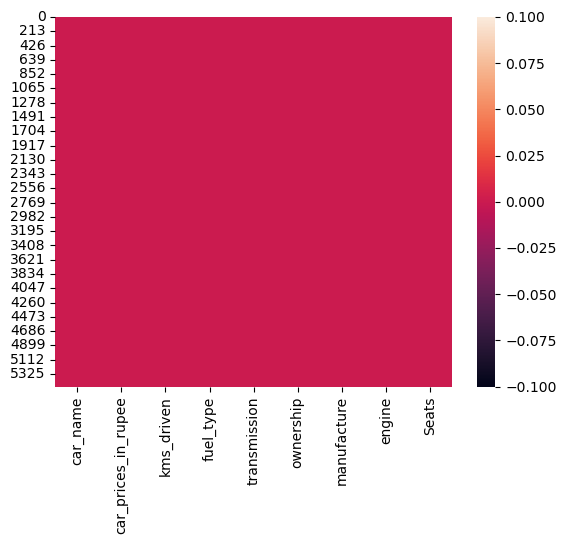

In [228]:
sns.heatmap(df.isnull())

In [229]:
cat_var=[]
num_var=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat_var.append(i)
    else:
        num_var.append(i)

In [230]:
num_var,cat_var

(['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats'],
 ['car_name', 'fuel_type', 'transmission', 'ownership'])

<Axes: >

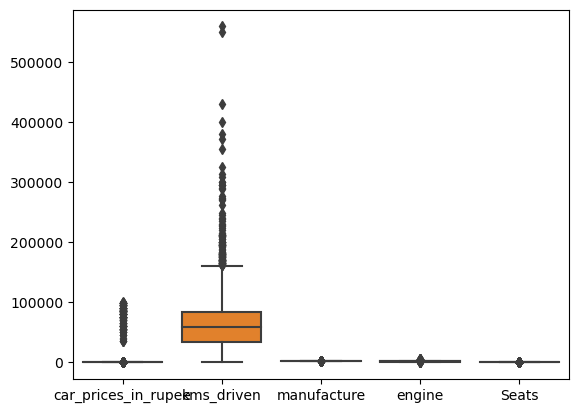

In [231]:
sns.boxplot(df[num_var])

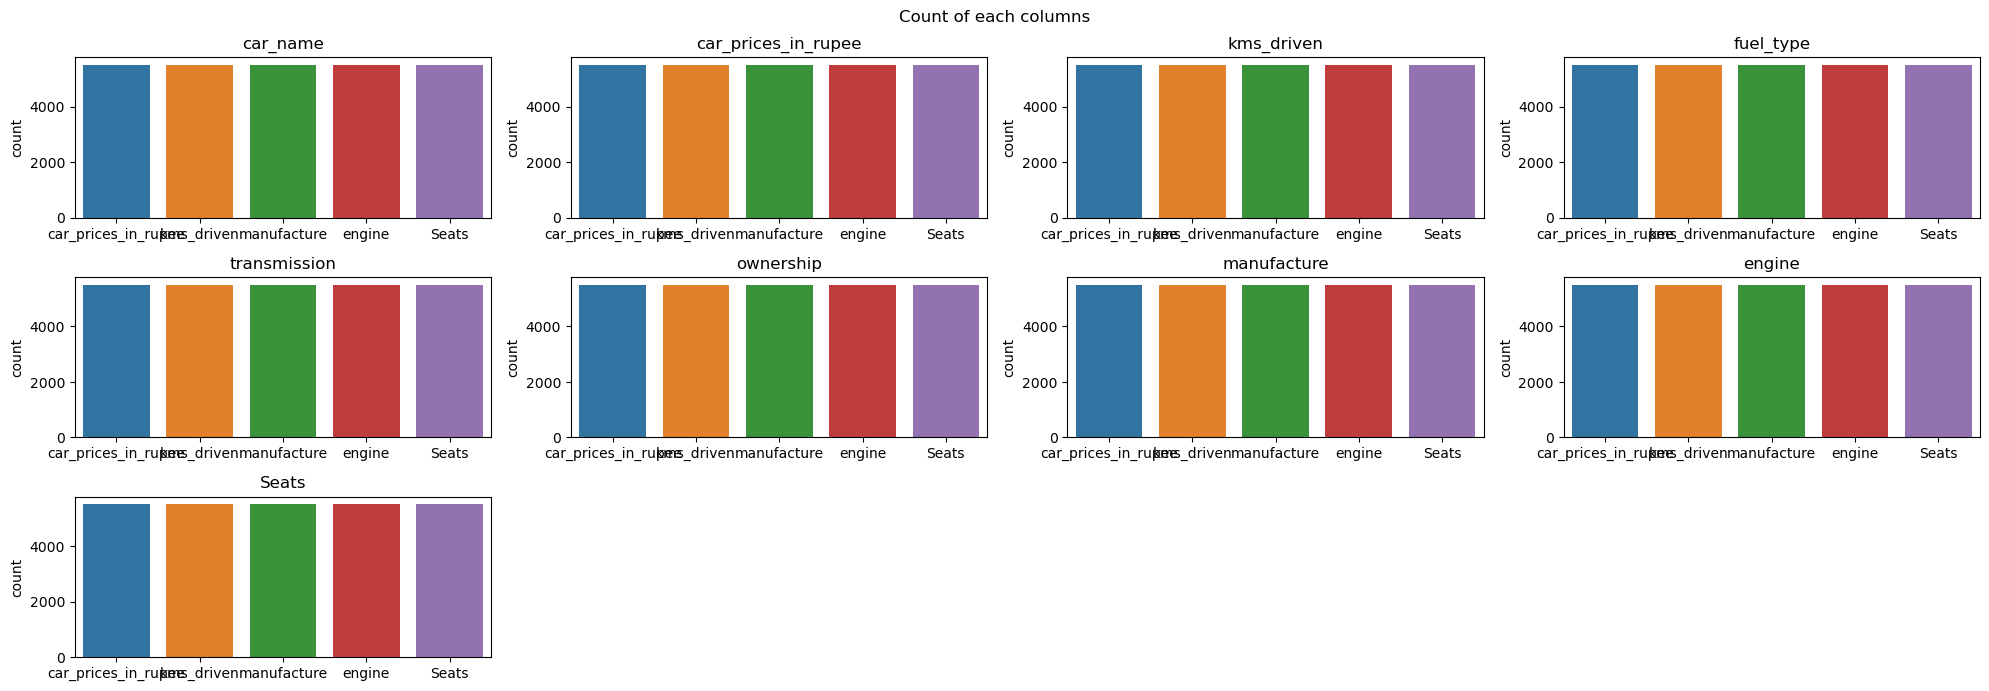

In [232]:
plt.figure(figsize=(20,9))

for i,v in enumerate(df):
    plt.subplot(4,4,i+1)
    sns.countplot(df)
    plt.title(v)
    
plt.suptitle("Count of each columns")
plt.tight_layout()
plt.show()

In [233]:
X=df.drop(columns='car_prices_in_rupee')
y=df['car_prices_in_rupee']

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [236]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3307, 8), (2205, 8), (3307,), (2205,))

In [237]:
X_train.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1627,Volkswagen Vento 1.5 TDI Highline,15000,Diesel,Manual,1st,2013,1497,5
1522,Mercedes-Benz C-Class C 200 CGI Grand Edition,28000,Petrol,Automatic,1st,2018,2143,5
835,Toyota Innova Crysta 2.4 G MT,43200,Diesel,Manual,1st,2017,2143,5
358,Hyundai i10 Magna 1.2,64640,Petrol,Manual,1st,2009,1197,5
138,Ford Aspire 1.2 Ti-VCT Titanium,23400,Petrol,Manual,1st,2017,1196,5


In [238]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [239]:
onh=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
stc=StandardScaler()

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [268]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3307 entries, 1627 to 860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      3307 non-null   object
 1   kms_driven    3307 non-null   int64 
 2   fuel_type     3307 non-null   object
 3   transmission  3307 non-null   object
 4   ownership     3307 non-null   object
 5   manufacture   3307 non-null   int64 
 6   engine        3307 non-null   int64 
 7   Seats         3307 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 232.5+ KB


In [269]:
tf1=ColumnTransformer(transformers=[
    ('onh',onh,[0,2,3,4,6])
],remainder='passthrough')

In [270]:
tf2=ColumnTransformer(transformers=[
    ('stc',stc,slice(0,None))
],remainder='passthrough')

In [286]:
df.shape

(5512, 9)

In [271]:
pipe_lgs=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('linear regression',LinearRegression())
])

In [272]:
pipe_lgs.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 2, 3, 4, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('linear regression', LinearRegression())])

In [273]:
y_pred_lgr=pipe_lgs.predict(X_test)

In [274]:
y_pred_lgr

array([-1250.06703522, -5890.06703522,  2077.93296478, ...,
       -2542.06703522,   453.93296478,  1893.93296478])

In [275]:
r2_score(y_test,y_pred_lgr)

-7.28254719308409e+26

In [281]:
mean_absolute_error(y_test,y_pred_lgr)

4.4161741005742184e+16

In [282]:
mean_squared_error(y_test,y_pred_lgr)

8.732268555232687e+34

In [283]:
df.sample()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
2385,Mahindra XUV300 W6 Diesel,10.5,27850,Diesel,Manual,1st,2020,1197,5


In [285]:
pipe_lgs.predict(pd.DataFrame([['Mahindra XUV300 W6 Diesel',27850,'Diesel','Manual','1st',2020,1197,5]],columns=['car_name','kms_driven','fuel_type','transmission','ownership','manufacture','engine','Seats']))

array([2.36486608e+14])

In [287]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('DecisionTree regression',DecisionTreeRegressor())
])

In [288]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 2, 3, 4, 6])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('DecisionTree regression', DecisionTreeRegressor())])

In [289]:
y_pred_dtr=pipe_dtc.predict(X_test)

In [290]:
r2_score(y_test,y_pred_dtr)

-0.25779811529473196